# Gun Violence Analysis - First Version

In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import altair as alt
alt.renderers.enable('notebook')
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/gun_violence.csv')

In [3]:
df.head()

Unnamed: 0      Incident Date     State   City Or County  \
0           0  November 26, 2016  Maryland    Sabillasville   
1           1  November 26, 2016      Ohio     Grand Rapids   
2           2  November 24, 2016  New York      Sandy Creek   
3           3  November 24, 2016   Florida      Black Point   
4           4  November 23, 2016  Michigan  Powell Township   

                                  Address  # Killed  # Injured  Operations  \
0  6600 block of Eylers Valley Flint Road         1          0         NaN   
1                             SR Route 65         1          0         NaN   
2                              Kehoe Road         1          0         NaN   
3                                     NaN         1          0         NaN   
4              North 1311 County Road KCI         1          0         NaN   

     Category    Age  
0  Accidental  Adult  
1  Accidental  Adult  
2  Accidental  Adult  
3  Accidental  Adult  
4  Accidental  Adult

Convert `Incident Date` to a datetime object

In [4]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'], format="%B %d, %Y")

Drop `Unnamed` column

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.head()

Incident Date     State   City Or County  \
0    2016-11-26  Maryland    Sabillasville   
1    2016-11-26      Ohio     Grand Rapids   
2    2016-11-24  New York      Sandy Creek   
3    2016-11-24   Florida      Black Point   
4    2016-11-23  Michigan  Powell Township   

                                  Address  # Killed  # Injured  Operations  \
0  6600 block of Eylers Valley Flint Road         1          0         NaN   
1                             SR Route 65         1          0         NaN   
2                              Kehoe Road         1          0         NaN   
3                                     NaN         1          0         NaN   
4              North 1311 County Road KCI         1          0         NaN   

     Category    Age  
0  Accidental  Adult  
1  Accidental  Adult  
2  Accidental  Adult  
3  Accidental  Adult  
4  Accidental  Adult

# Audience

# Claim/Objective

<hr style="height:0;border:1px solid #ececec" />

# Setting up color palette

We first begin by setting a color palette for the visualization so that all our referencing for the Categories will be consistent.

Using the ColorBrewer website (http://colorbrewer2.org/#type=diverging&scheme=Spectral&n=4), we determine a color palette that is photovopy safe.

In [7]:
df.Category.unique()

array(['Accidental', 'Intentional', 'Mass Shootings',
       'Police Involvement'], dtype=object)

In [8]:
palette = alt.Scale(domain=['Accidental', 'Intentional', 'Mass Shootings','Police Involvement'], \
                  range=['#2b83ba', '#fdae61', '#abdda4','#d7191c'])

<hr/>

# To support our claim, we have developed the following visualizations:

## 1. Injuries and deaths and the correlation to its category?

In [9]:
df1 = df.copy()

In [10]:
df1[df1.duplicated(['Incident Date','Address'])].sort_values(['Incident Date', 'Address'], ascending=True)

Incident Date           State     City Or County  \
995     2014-01-01     Mississippi       Bogue Chitto   
989     2014-02-07   Massachusetts             Boston   
3461    2014-03-01         Florida          Pensacola   
1948    2014-03-01           Texas             Dallas   
1949    2014-03-01    Pennsylvania             Butler   
3460    2014-03-05      California              Nuevo   
3459    2014-03-05         Alabama             Mobile   
3458    2014-03-10           Texas             Eureka   
980     2014-03-11         Indiana         Greensburg   
3457    2014-03-11        Oklahoma       Broken Arrow   
1940    2014-03-18            Utah          Richfield   
976     2014-04-03        Oklahoma            Bokoshe   
3453    2014-04-03        Oklahoma            Bokoshe   
974     2014-04-04         Georgia           Waycross   
3452    2014-04-04         Georgia           Waycross   
975     2014-04-04         Georgia           Savannah   
3451    2014-04-04         Georgia           Savannah   
3450    2014-04-05    Pennsylvania       Philadelphia   
3446    2014-04-12  South Carolina             Gaston   
3445    2014-04-13  North Carolina          Charlotte   
3442    2014-04-21            Iowa         Des Moines   
3439    2014-04-25  North Carolina       Fayetteville   
3437    2014-04-26         Indiana       Noble County   
973     2014-04-28  North Carolina             Durham   
3435    2014-04-28  North Carolina             Durham   
3434    2014-04-29          Kansas            Wichita   
3433    2014-05-03    Pennsylvania     Dingmans Ferry   
3662    2014-05-10         Georgia     Stone Mountain   
1934    2014-05-17  North Carolina          Wadesboro   
3426    2014-05-24           Texas             Boerne   
...            ...             ...                ...   
2478    2016-11-15       Louisiana        Baton Rouge   
1502    2016-11-15        Michigan    Alcona (county)   
1964    2016-11-15        Michigan    Alcona (county)   
4505    2016-11-15        Michigan    Alcona (county)   
1500    2016-11-16     Mississippi    Marion (county)   
2476    2016-11-16     Mississippi    Marion (county)   
4078    2016-11-17       Tennessee          Dyersburg   
4497    2016-11-17       Tennessee          Dyersburg   
4977    2016-11-18  South Carolina         Clearwater   
4494    2016-11-18        Illinois            Chicago   
1963    2016-11-19        Illinois  Pembroke Township   
4485    2016-11-19        Illinois  Pembroke Township   
4972    2016-11-21        Illinois            Chicago   
1499    2016-11-21         Florida          Pensacola   
2471    2016-11-21         Florida          Pensacola   
4467    2016-11-22      California        Los Angeles   
706     2016-11-22         Indiana           Anderson   
4968    2016-11-22         Indiana           Anderson   
1498    2016-11-22            Ohio           Columbus   
2468    2016-11-22            Ohio           Columbus   
4466    2016-11-22        Illinois            Chicago   
707     2016-11-22        Virginia     Christiansburg   
4969    2016-11-22         Florida              Miami   
4460    2016-11-23     Mississippi       Olive Branch   
500     2016-11-23   West Virginia               Troy   
2964    2016-11-23   West Virginia               Troy   
1497    2016-11-24    Pennsylvania       Philadelphia   
2466    2016-11-24    Pennsylvania       Philadelphia   
1496    2016-11-25         Montana           Billings   
2464    2016-11-25         Montana           Billings   

                                              Address  # Killed  # Injured  \
995                              1347 Brumfield Rd SW         1          0   
989                                    617 Morton St.         1          0   
3461                       1500 block of Fairfield Dr         1          0   
1948                                              NaN         0          1   
1949                                              NaN         0          1   
34

In [11]:
df1 = df1.set_index(['Incident Date','Address']).sort_values('Incident Date', ascending=True)
df1.head(100)

State  \
Incident Date Address                                                         
2014-01-01    Rockingham Street and Berkley Avenue Extended        Virginia   
              1347 Brumfield Rd SW                              Mississippi   
              800 Growth Avenue                                     Indiana   
              Highway 301                                    South Carolina   
              1347 Brumfield Rd SW                              Mississippi   
2014-01-02    200 block of Hustosky Road                       Pennsylvania   
2014-01-03    Farmers Boulevard and 133rd Avenue                   New York   
2014-01-07    1600 block of N Maple                              California   
2014-01-11    1187 Greene Rd 336                                   Arkansas   
              3600 block of Highway 80 W                          Louisiana   
              Southeast Stark and 99th                               Oregon   
              Southeast Marie                                        Oregon   
2014-01-12    NaN                                                 Louisiana   
              University Drive                                      Alabama   
              300 block of North Street                            Illinois   
2014-01-13    800 block of Calvert St                              Michigan   
2014-01-14    West 86th Street                                   California   
2014-01-16    NaN                                                  Oklahoma   
              Dysart and Indian School                              Arizona   
              37 N. 630 West                                           Utah   
2014-01-17    Turner Avenue                                      California   
2014-01-20    8509 Rixlew Ln                                       Virginia   
              3100 block of Cotton Place                            Alabama   
2014-01-21    2930 South Hanna Street                               Indiana   
              Springfield Avenue                                 New Jersey   
2014-01-24    8100 block of East Misty Morning Place               Oklahoma   
2014-01-25    S. Union Av and W. 51st St                           Illinois   
              600 block of Covenant Drive                           Florida   
              1100 block of highway 31                                Texas   
2014-01-27    Edwards Street                                 North Carolina   
...                                                                     ...   
2014-03-01    1500 block of Fairfield Dr                            Florida   
              NaN                                                  Oklahoma   
              NaN                                                     Texas   
              28615 Rock Ridge Dr                                  Illinois   
              12800 block of Gotham                                   Texas   
              NaN                                              Pennsylvania   
2014-03-03    NaN                                                   Arizona   
2014-03-05    2600 block of Wealthy Street                          Alabama   
               31000 block of Wolfskill Avenue                   California   
               31000 block of Wolfskill Avenue                   California   
              Law Street                                     South Carolina   
              2600 block of Wealthy Street                          Alabama   
2014-03-07    Tamar Ct                                                 Ohio   
2014-03-08    4900 West Race Ave                                   Illinois   
              1600 block of First Street                         California   
2014-03-09     4900 block of West Race Avenue                         Texas   
              531 W State St                                           Ohio   
2014-03-10    SE 3144                                                 Texas   
              SE 3144                    

Assigning binary values to killed and injured

In [12]:
df1['Death'] = df1['# Killed'].apply(lambda x: 0 if x == 0 else 1)

In [13]:
df1['Injury'] = df1['# Injured'].apply(lambda x: 0 if x == 0 else 1)

In [14]:
df2 = df1.groupby(['Incident Date','Category']).sum().reset_index()

In [15]:
df2.head(20)

Incident Date        Category  # Killed  # Injured  Operations  Death  \
0     2014-01-01      Accidental         2          2         0.0      2   
1     2014-01-01  Mass Shootings         2          2         0.0      1   
2     2014-01-02      Accidental         1          0         0.0      1   
3     2014-01-03  Mass Shootings         1          3         0.0      1   
4     2014-01-07      Accidental         0          2         0.0      0   
5     2014-01-11      Accidental         1          1         0.0      1   
6     2014-01-11  Mass Shootings         0         11         0.0      0   
7     2014-01-12  Mass Shootings         0         16         0.0      0   
8     2014-01-13  Mass Shootings         0          4         0.0      0   
9     2014-01-14  Mass Shootings         0          4         0.0      0   
10    2014-01-16      Accidental         0          1         0.0      0   
11    2014-01-16  Mass Shootings         7          4         0.0      2   
12    2014-01-17      Accidental         0          1         0.0      0   
13    2014-01-20      Accidental         1          0         0.0      1   
14    2014-01-20  Mass Shootings         0          4         0.0      0   
15    2014-01-21      Accidental         0          1         0.0      0   
16    2014-01-21  Mass Shootings         2          3         0.0      1   
17    2014-01-24      Accidental         0          1         0.0      0   
18    2014-01-25      Accidental         1          0         0.0      1   
19    2014-01-25  Mass Shootings         1          8         0.0      1   

    Injury  
0        2  
1        1  
2        0  
3        1  
4        1  
5        1  
6        2  
7        3  
8        1  
9        1  
10       1  
11       1  
12       1  
13       0  
14       1  
15       1  
16       1  
17       1  
18       0  
19       2

In [16]:
source = df2

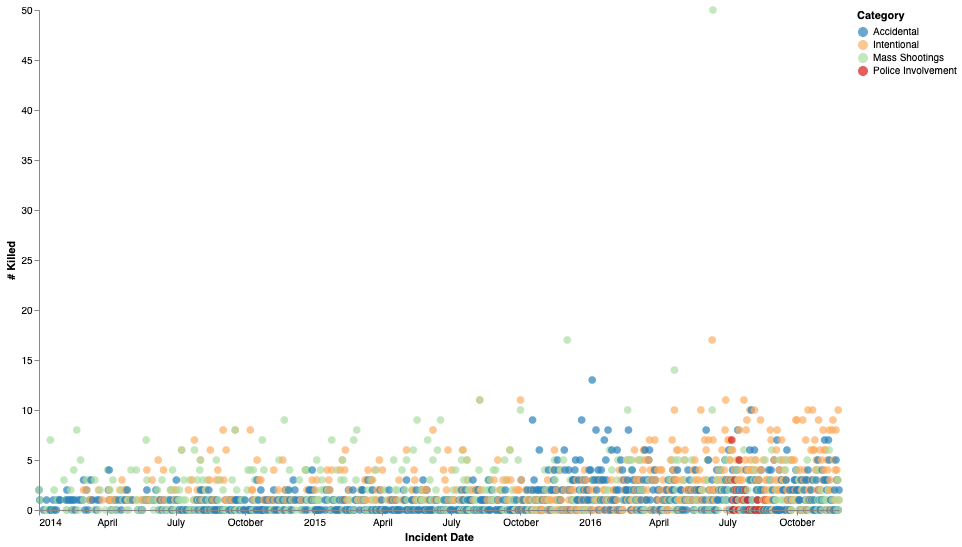

In [17]:
chart = alt.Chart(source).mark_circle(size = 60).encode(
    x = 'Incident Date',
    y = '# Killed',
    color = alt.Color('Category', scale=palette),
    tooltip = ['Category','Incident Date','# Killed','# Injured']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 800,
    height = 500
)

### Narrative
We were interested in the correlation between gun incident types and the category associated. This visualization is able to show the amount of killings per category over the range of dates in the data set. From here we can visually see that intentional incidents occur most often in the 5 to 10 death range, while accident incidents occur with 1 to 2 deaths most often. Hovering over each incident will give the category, date, injuries, and death.


### Data Wrangling
1. Delete duplicates from the data set
2. Drop unneeded columns
3. Group by Data and category to acquire the sum of these category's statistics

### Road Map
1. Include Age in the analysis
2. Include Injuries in a better way than tooltips to the visualization

## 2. Is there seasonality to gun violence?

#### We look at the pattern for each incident category

We first begin by making a copy of the dataframe for analysis and renaming the column `Incident Date` to `Date`.

In [18]:
df_seasonality = df.copy()
df_seasonality.rename(columns={'Incident Date': 'Date'}, inplace=True)

In [19]:
df_seasonality.head()

Date     State   City Or County  \
0 2016-11-26  Maryland    Sabillasville   
1 2016-11-26      Ohio     Grand Rapids   
2 2016-11-24  New York      Sandy Creek   
3 2016-11-24   Florida      Black Point   
4 2016-11-23  Michigan  Powell Township   

                                  Address  # Killed  # Injured  Operations  \
0  6600 block of Eylers Valley Flint Road         1          0         NaN   
1                             SR Route 65         1          0         NaN   
2                              Kehoe Road         1          0         NaN   
3                                     NaN         1          0         NaN   
4              North 1311 County Road KCI         1          0         NaN   

     Category    Age  
0  Accidental  Adult  
1  Accidental  Adult  
2  Accidental  Adult  
3  Accidental  Adult  
4  Accidental  Adult

Assigning a Period to each incident (Quarter).

In [20]:
df_seasonality['Period'] = df_seasonality.Date.apply(lambda x: x.to_period("Q").to_timestamp())

In [21]:
df_seasonality.head()

Date     State   City Or County  \
0 2016-11-26  Maryland    Sabillasville   
1 2016-11-26      Ohio     Grand Rapids   
2 2016-11-24  New York      Sandy Creek   
3 2016-11-24   Florida      Black Point   
4 2016-11-23  Michigan  Powell Township   

                                  Address  # Killed  # Injured  Operations  \
0  6600 block of Eylers Valley Flint Road         1          0         NaN   
1                             SR Route 65         1          0         NaN   
2                              Kehoe Road         1          0         NaN   
3                                     NaN         1          0         NaN   
4              North 1311 County Road KCI         1          0         NaN   

     Category    Age     Period  
0  Accidental  Adult 2016-10-01  
1  Accidental  Adult 2016-10-01  
2  Accidental  Adult 2016-10-01  
3  Accidental  Adult 2016-10-01  
4  Accidental  Adult 2016-10-01

Checking the available unique categories of incidents.

In [22]:
df_seasonality.Category.unique()

array(['Accidental', 'Intentional', 'Mass Shootings',
       'Police Involvement'], dtype=object)

Create a new dataframe for plotting the chart on gun violence occurence by period.

In [23]:
seasonality = df_seasonality.groupby(['Period', 'Category'], as_index=False)['Date'].count().rename(columns={'Date':'Count'})

In [24]:
seasonality.head()

Period        Category  Count
0 2014-01-01      Accidental     54
1 2014-01-01     Intentional      9
2 2014-01-01  Mass Shootings     50
3 2014-04-01      Accidental     52
4 2014-04-01     Intentional     40

### Overall seasonality of gun violence in the United States between 2014 - 2016

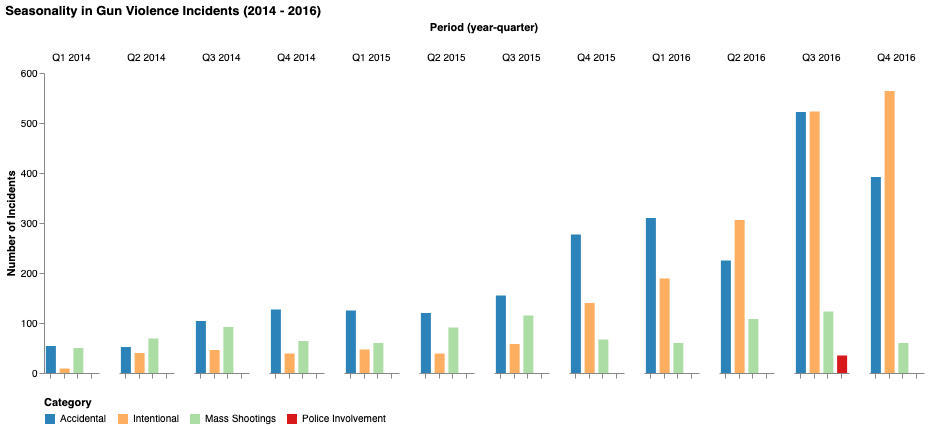

In [25]:
chart = alt.Chart(seasonality, title='Seasonality in Gun Violence Incidents (2014 - 2016)', name='seasonality') \
        .mark_bar(size=10) \
        .encode(
    column = alt.Column('Period', timeUnit='yearquarter'),
    x = alt.X('Category', axis=alt.Axis(labels=False, title=None)),
    y = alt.Y('sum(Count)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=palette),
    tooltip = ['Period', 'Count', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 55
).configure_legend(
     orient = "bottom"
)

### Visualizing Individual Categories by Month

Visualizing the trend for Accidental Gun Violence Incidents

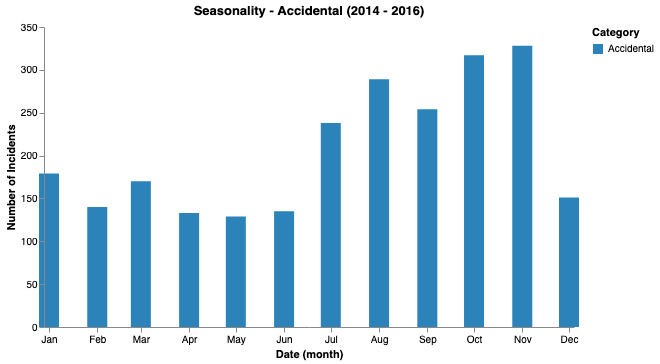

In [42]:
chart = alt.Chart(df_seasonality[df_seasonality['Category'] == 'Accidental'], title='Seasonality - Accidental (2014 - 2016)', name='seasonality_accidental') \
        .mark_bar(size=20, color='#1f77b4') \
        .encode(
    x = alt.X('Date', timeUnit='month'),
    y = alt.Y('count(Date)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#2b83ba'])),
    tooltip = ['count(Date)', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

Visualizing the trend for Intentional Gun Violence Incidents

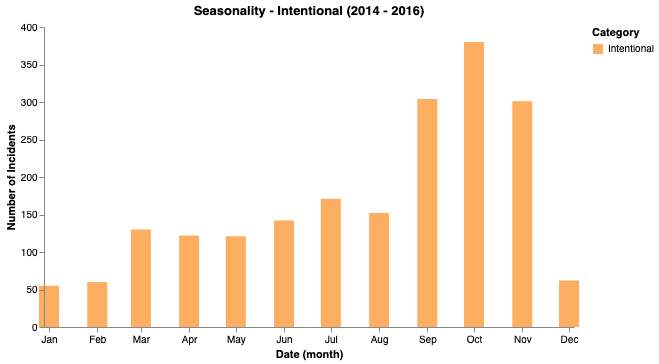

In [41]:
chart = alt.Chart(df_seasonality[df_seasonality['Category'] == 'Intentional'], title='Seasonality - Intentional (2014 - 2016)', name='seasonality_intentional') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Date', timeUnit='month'),
    y = alt.Y('count(Date)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#fdae61'])),
    tooltip = ['count(Date)', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

Visualizing the trend for Mass Shootings Gun Violence Incidents

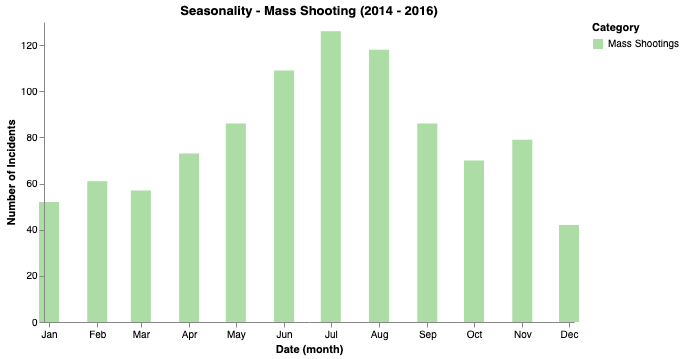

In [40]:
chart = alt.Chart(df_seasonality[df_seasonality['Category'] == 'Mass Shootings'], title='Seasonality - Mass Shooting (2014 - 2016)', name='seasonality_mass') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Date', timeUnit='month'),
    y = alt.Y('count(Date)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#abdda4'])),
    tooltip = ['count(Date)', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

Visualizing the trend for Police Involvement Gun Violence Incidents

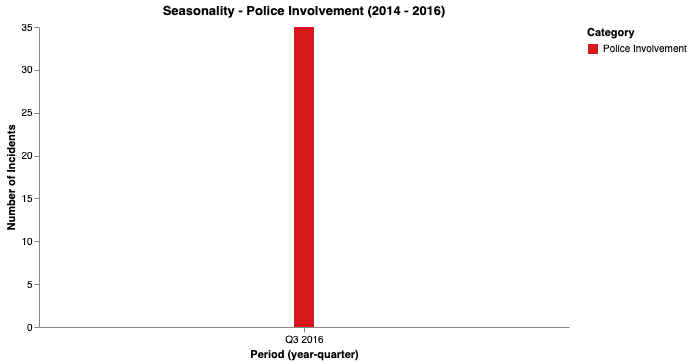

In [29]:
chart = alt.Chart(seasonality[seasonality['Category'] == 'Police Involvement'], title='Seasonality - Police Involvement (2014 - 2016)', name='seasonality_police') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Period', timeUnit='yearquarter'),
    y = alt.Y('sum(Count)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#d7191c'])),
    tooltip = ['Period', 'Count', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

### Observations

Looking at the charts, we can see that:
<ol>
    <li>There is an overall increasing trend to gun violence incidents in the United States between 20014 - 2018.</li>
    <li>There is a sudden spike in 2016 Q3 in Accidental and Intentional incidents from previous quarters.</li>
    <li>There is a higher occurence of Mass Shootings in Q3 compared to other quarters in all years.</li>
    <li>Accidental gun violence incidents are more common in the second half (July - December) of the year, with November recording the highest.</li>
    <li>Beginning March 2014, there is at least 1 reported incident of gun violence in the United States each month.</li>
</ol>
    

### Narrative

The above charts indicates that there is a seasonality to gun violence incidents, in that they usually occur during months with a holiday season or when the weather is warmer. For example, total Mass Shooting incidents in July is 142% higher than in January at 126 and 52 incidents, respectively. And while November and December are both festive months, November recorded a total of 328 incidents compared to 151 incidents in December for accidental incidents, a 117% difference.

## 3. Frequency of police involvement in acts of gun violence?

<hr/>

# Conclusion

Overall, gun violence in America is seeing an increasing trend, not only in incident occurrences, but also in victim counts, whether it be in numbers injured or killed. Additionally, months that have warmer temperatures or have major holiday/festive celebrations happenning are more likely to have gun violence incidents than months with lower temperatures. A quick search online on the corelation between temperatures and shooting incidents in the United States confirms this finding. One such report was an [article by The New York Times](https://www.nytimes.com/2018/09/21/upshot/a-rise-in-murder-lets-talk-about-the-weather.html).

# Future Work

More work can be explored in terms of seasonality and the effects of weather on gun violence using the dataset. We can also run our analysis by victim age groups to see if there is also a pattern there.

<hr/>

# References

Dataset Source:  
**Gun Violence Archive** - https://www.gunviolencearchive.org/reports

Color Palette:  
**ColorBrewer 2.0** - http://colorbrewer2.org

Asher, J., (2018). A Rise in Murder? Let’s Talk About the Weather. _The New York Times_. Available at: https://www.nytimes.com/2018/09/21/upshot/a-rise-in-murder-lets-talk-about-the-weather.html. Accessed on: May 25, 2019.

[EOF]